In [ ]:
library("DESeq2")
library(ggplot2)


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

In [ ]:
dds <- readRDS('merged_atlas.rds')

In [ ]:
list_ <- c('Yamashiro2018_IPSC', 'Yamashiro2018_IPSC', 'Yamashiro2018_iMeLC',
       'Yamashiro2018_iMeLC', 'Yamashiro2018_d6PGCLC',
       'Yamashiro2018_d6PGCLC', 'Yamashiro2018_d6PGCLC',
       'Tang2015_hPGCw7f', 'Tang2015_hPGCw7f', 'Tang2015_hPGCw9f',
       'Tang2015_hPGCw9f', 'Yamashiro2018_ag7', 'Yamashiro2018_ag7',
       'Yamashiro2018_ag21', 'Yamashiro2018_ag21', 'Yamashiro2018_ag35',
       'Yamashiro2018_ag35', 'Yamashiro2018_ag77_1390G3_AG+VT-',
       'Yamashiro2018_ag77', 'Yamashiro2018_ag77',
       'Yamashiro2018_ag77_1390G3_VT',
       'Yamashiro2018_ag120_1390G3',
       'Yamashiro2018_ag120_1390G3_VT',
       'Yamashiro2018_ag120_1390G3_VT',
       'Yamashiro2018_ag120_1390G3_VT',
       'Yamashiro2018_ag120_1390G3', 'Yatsenko2019_FetOva',
       'Yatsenko2019_FetOva', 'Yatsenko2019_FetOva',
       'Zhang2017_Primordial_oocyte', 'Zhang2017_Primordial_oocyte',
       'Zhang2017_Primary_oocyte', 'Zhang2017_Primary_oocyte',
       'Zhang2017_Primary_oocyte', 'Zhang2017_Secondary_oocyte',
       'Zhang2017_Secondary_oocyte', 'Zhang2017_Secondary_oocyte',
       'Zhang2017_Antral_oocyte', 'Zhang2017_Antral_oocyte', 'D3-DDX4',
       'DNR3', 'Control-N3V', 'DLX5-N3V', 'HHEX-N3V', 'FIGLA-N3V',
       'Control-EB', 'F2_LTC', 'F3_LTC')
for (i in list_) {
    print(i)
    res <- results(dds,contrast=c("Condition",i,"Control"))
    write.csv(res, file=paste("results/",i, ".csv", sep=""))
    
}


In [ ]:
i <- "D3-DDX4"
res <- results(dds,contrast=c("Condition",i,"Control"))
write.csv(res, file=paste("results/",i, ".csv", sep=""))

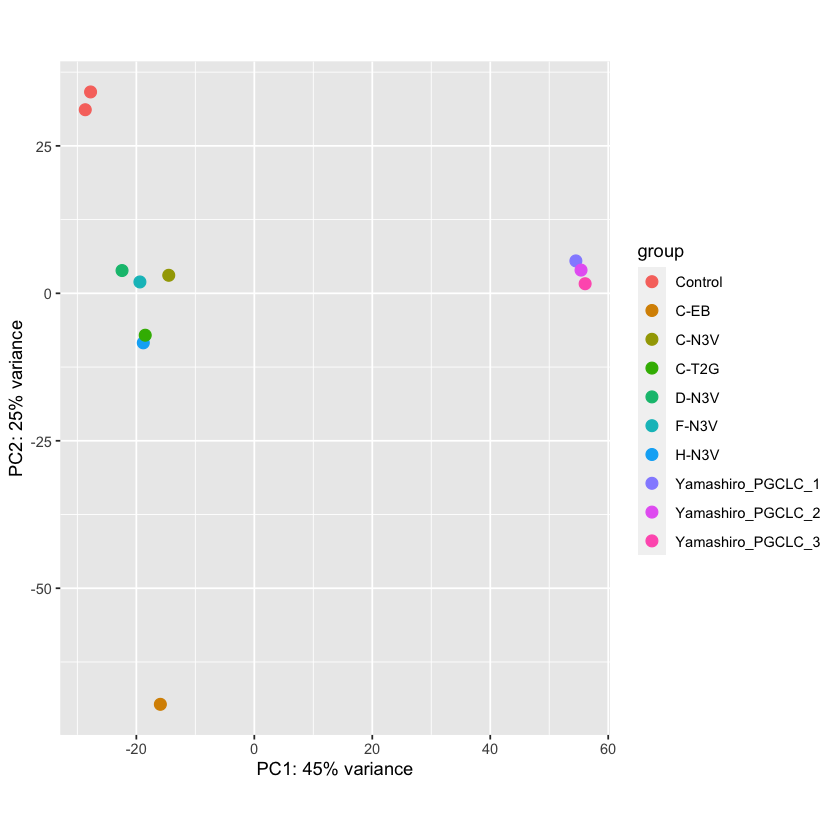

In [ ]:
rld <- rlog(dds)
plotPCA(rld, intgroup = "Condition")

In [ ]:
rld_mat <- assay(rld)
rld_cor <- cor(rld_mat)    ## cor() is a base R function
head(rld_cor) 

,C.N3V,D.N3V,H.N3V,F.N3V,C.T2G,C.EB,F3,F2,Yamashiro2018_d6PGCLC_1,Yamashiro2018_d6PGCLC_2,Yamashiro2018_d6PGCLC_3
C.N3V,1.0000000,0.9799723,0.9855015,0.9900290,0.9858571,0.9571525,0.9682615,0.9661760,0.9643372,0.9640759,0.9635900
D.N3V,0.9799723,1.0000000,0.9858489,0.9829947,0.9786869,0.9578848,0.9750624,0.9739346,0.9569298,0.9579099,0.9579549
H.N3V,0.9855015,0.9858489,1.0000000,0.9861584,0.9844984,0.9664422,0.9719204,0.9706664,0.9615814,0.9623202,0.9622032
F.N3V,0.9900290,0.9829947,0.9861584,1.0000000,0.9880152,0.9600799,0.9719886,0.9710191,0.9625391,0.9629755,0.9628474
C.T2G,0.9858571,0.9786869,0.9844984,0.9880152,1.0000000,0.9630443,0.9677566,0.9663718,0.9609225,0.9611501,0.9610240
C.EB,0.9571525,0.9578848,0.9664422,0.9600799,0.9630443,1.0000000,0.9470911,0.9458348,0.9405501,0.9411864,0.9427211


In [ ]:
### Load pheatmap package
library(pheatmap)

meta <-  read.csv('~/Documents/EGG/pgclc_check/pgclc_samplesheet.csv', header = TRUE, sep = ",")
### Plot heatmap
pheatmap(rld_cor, annotation = meta)

ERROR: Error in check.length("fill"): 'gpar' element 'fill' must not be length 0
